In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [179]:
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
print(df.head())
print(df.shape)

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
(506, 14)


C:\Users\smajl\AppData\Local\Temp\ipykernel_12616\3111313605.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


In [180]:
x_train = df.iloc[:, 0].values   # first column
y_train = df.iloc[:, 13].values  # last column (target)
print(x_train.shape, y_train.shape)
print(x_train[:5], y_train[:5])


(506,) (506,)
[0.00632 0.02731 0.02729 0.03237 0.06905] [24.  21.6 34.7 33.4 36.2]


In [181]:


def prediction(x, w, b):
    m = x.shape[0]
    predictions = np.zeros(m)

    for i in range(m):
        predictions[i] = w * x[i] + b
    return predictions

In [182]:
def cost (x, w, b, y):
    m=x.shape[0]
    cost=0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
        
    total_cost = (1/(2*m)) * cost
    return total_cost
    

In [183]:
def compute_gradients (x,y,w,b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range (m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m 

    return dj_dw, dj_db

In [184]:
def gradient_descent(x,y, w_initial, b_initial, learning_rate, number_of_iterations):
    w = w_initial 
    b = b_initial
    cost_history = []
    
    for i in range (number_of_iterations):
        dj_dw, dj_db = compute_gradients(x,y,w,b)

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        cost_history.append(cost(x,w,b,y))

    return w, b, cost_history

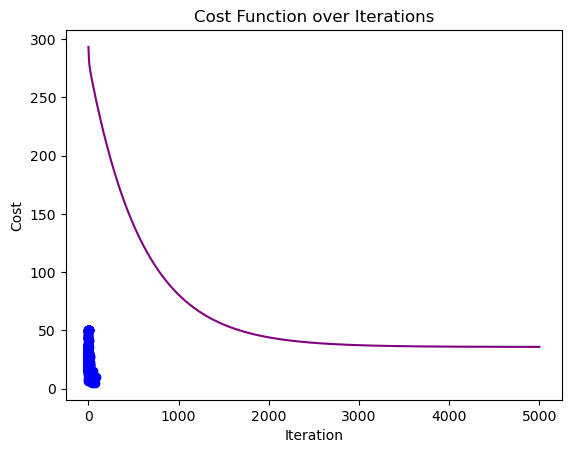

In [185]:
w_final, b_final, cost_history = gradient_descent(x_train, y_train, 0, 0, learning_rate=0.001, number_of_iterations=5000)


plt.scatter(x_train, y_train, color="blue", label="Actual Data")
plt.plot(range(len(cost_history)), cost_history, color="purple")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

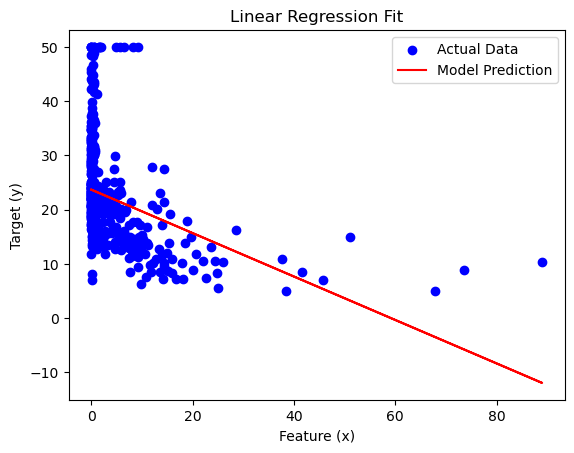

In [186]:
preds = prediction(x_train, w_final, b_final)

plt.scatter(x_train, y_train, color="blue", label="Actual Data")
plt.plot(x_train, preds, color="red", label="Model Prediction")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
